# Validacion de modelos
Al entrenar y evaluar modelos de ML, uno de los aspectos más importantes es **validar** correctamente para estimar de forma fiable cómo se comportará el modelo con datos nuevos (no vistos). 

Aunque la forma más básica es la separación de datos en *train* y *test* (train_test_split), existen diferentes técnicas de validación más sofisticadas que se utilizan para maximizar el uso de los datos disponibles y obtener una estimación más estable del desempeño del modelo.

La **validación cruzada** en Scikit-learn es una técnica que se utiliza para evaluar el desempeño de un modelo predictivo, dividiendo los datos en conjuntos de entrenamiento y prueba múltiples veces de manera sistemática. Esto permite obtener una estimación más confiable y robusta del rendimiento del modelo que simplemente dividir los datos una sola vez.

**Métodos para realizar validación de modelos**

1. train_test_split
2. cross_val_score (No devuelve un modelo entrenado, devuelve los resultados de entrenar y validar multiples veces, para que podamos evaluar un modelo de forma mas fiable que con un solo train test)
3. cross_validate
4. cross_val_predict
5. make_scorer



**Clases para realizar distintos tipos de validación cruzada**

1. KFold
2. StratifiedKFold
3. LeaveOneOut
4. RepeatedStratifiedKFold
5. GroupKFold
6. TimeSeriesSplit


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, LeaveOneOut, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, get_scorer_names
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris


# cros_val_store
![alt text](image.png)

In [2]:
X, y = load_iris(return_X_y=True) #clasificacion multiclase, prededir la columna y

In [3]:
model = LogisticRegression()
cross_val_score(model, X, y, scoring='accuracy') # validación cruzada

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [4]:
#quitar warning poniendo max_iter
model = LogisticRegression(max_iter=500)
results = cross_val_score(model, X, y, scoring='accuracy') #por defecto cv=5
results

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

media: 0.9733333333333334
std: 0.02494438257849294


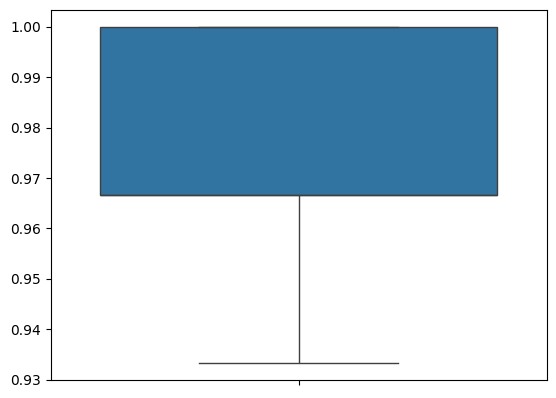

In [5]:
print(f'media: {results.mean()}')
print(f'std: {results.std()}')
sns.boxplot(results);

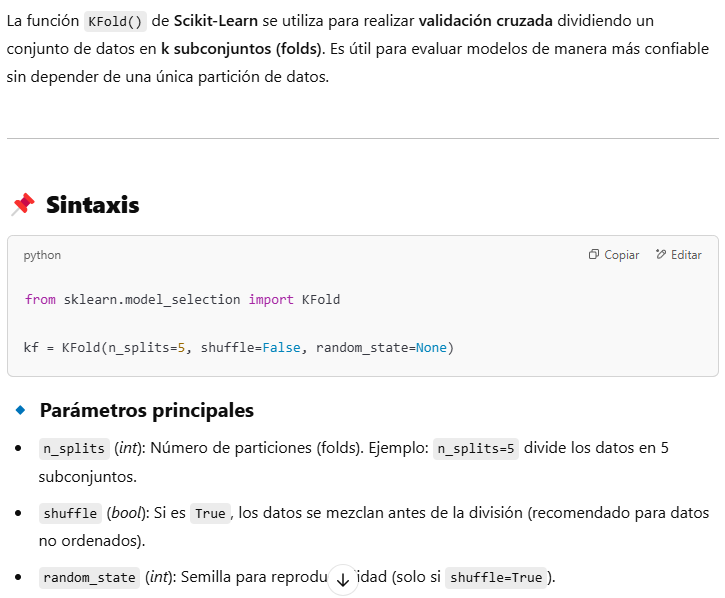

In [6]:
#Creando manualmente el KFold
X, y = load_iris(return_X_y=True) #clasificacion multiclase, prededir la columna y
model = LogisticRegression(max_iter=500)

KFold = KFold(n_splits=10, shuffle=True, random_state=42)

results = cross_val_score(model, X, y, scoring='accuracy', cv=KFold) #Entrena y valida 10 veces de forma independiente
print(f'results: {results}')
print(f'media: {results.mean()}')
print(f'std: {results.std()}')

results: [1.         1.         1.         1.         1.         0.86666667
 0.93333333 1.         1.         0.93333333]
media: 0.9733333333333334
std: 0.04422166387140532


In [7]:
#Creando manualmente el KFold
X, y = load_iris(return_X_y=True) #clasificacion multiclase, prededir la columna y
model = LogisticRegression(max_iter=500)

KFold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = cross_val_score(model, X, y, scoring='accuracy', cv=KFold) #Entrena y valida 10 veces de forma independiente
print(f'results: {results}')
print(f'media: {results.mean()}')
print(f'std: {results.std()}')

results: [1.         1.         1.         0.93333333 0.93333333 0.93333333
 1.         1.         0.93333333 0.93333333]
media: 0.9666666666666668
std: 0.033333333333333326


## Leave One Out (LOO-CV)
Caso extremo de KFold don K es igual al numero total de muestras:
* Se deja solo una muestra para validacion y se entrena con todas las demas
* Se repite para cada muestra o fila del dataset, por lo que se obtieen n estimaciones de error.
* Se aprovechan los datos al maximo
* Problema: coste computacional alto ya que entrena muchas mas veces
* Ideal para datasets pequeños

In [8]:


X, y = load_iris(return_X_y=True) #clasificacion multiclase, prededir la columna y
model = LogisticRegression(max_iter=500)

KFold = LeaveOneOut()

results = cross_val_score(model, X, y, scoring='accuracy', cv=KFold) #Entrena y valida 10 veces de forma independiente
print(f'results: {results}')
print(f'media: {results.mean()}')
print(f'std: {results.std()}')

results: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
media: 0.9666666666666667
std: 0.17950549357115014


## Multiples métricas

Hacer validacion cruzada con mas de una métrica
* Generalmete se pasaria un diccionario


In [9]:
print(sorted(get_scorer_names()))
# accuracy, f1 o f1_macro, roc_auc_ovr, precision_macro, recall_macro

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_max_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples'

In [13]:
X, y = load_iris(return_X_y=True) 
model = LogisticRegression(max_iter=500)

results = cross_validate(model, X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr'])
print(f'accuracy: {results['test_accuracy'].mean()}')
print(f'precision: {results['test_precision_macro'].mean()}')
print(f'recall: {results['test_recall_macro'].mean()}')
print(f'f1: {results['test_f1_macro'].mean()}')
print(f'AUC: {results['test_roc_auc_ovr'].mean()}')


accuracy: 0.9733333333333334
precision: 0.9767676767676768
recall: 0.9733333333333334
f1: 0.973165236323131
AUC: 0.9963333333333333


## Combinar train_test_split con validación cruzada

In [14]:
X, y = load_iris(return_X_y=True) 
model = LogisticRegression(max_iter=500)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print ('accuracy: ', results.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('accuracy test', accuracy_score(y_test, y_pred))

accuracy:  0.95
accuracy test 1.0
